# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Siti Alya Nurrohmah
- **Email:** sitialyanrrmh@gmail.com
- **ID Dicoding:** alyanrrmh

## Menentukan Pertanyaan Bisnis


- Bagaimana distribusi jumlah penyewa sepeda berdasarkan hari, musim dan bulan selama tahun 2011-2012?
- Bagaimana hubungan antara jumlah penyewa casual, registered dan jumlah total dengan temperatur, feels like temperatur, kelembapan (humidity) dan windspeed?
- Pada saat kapan peak hour penyewa sepeda pada tahun 2011-2012 dan berapa jumlahnya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
file_hour = 'https://raw.githubusercontent.com/sitialyanrrmh/project_analisis_data/5f4e6ceb29ddfb540d650f0df4091c40041649a4/data/hour.csv'
file_day = 'https://raw.githubusercontent.com/sitialyanrrmh/project_analisis_data/5f4e6ceb29ddfb540d650f0df4091c40041649a4/data/day.csv'

In [ ]:
hour_df = pd.read_csv(file_hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv(file_day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Memuat tabel hour dan day dengan mengimpor dataset dari github
- Kedua tabel tersebut ditampilkan 5 baris pertamanya dengan menggunakan syntax nama_dataframe.head()

### Assessing Data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Output untuk dataframe hour dan day di atas menunjukan informasi mengenai jumlah kolom, nama kolom, serta tipe data dari dataFrame
- Dalam output di atas terlihat bahwa kedua dataframe tidak mempunyai missing value

In [ ]:
print("Jumlah duplikasi data hour: ", hour_df.duplicated().sum())
print("Jumlah duplikasi data day: ", day_df.duplicated().sum())

Jumlah duplikasi data hour:  0
Jumlah duplikasi data day:  0


**Insight:**
- Pada dataset hour dan day tidak terdapat duplikasi data

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Kode di atas menunjukan analisa statistik deskriptif dari dataFrame hour
- Tidak terdapat kenehan nilai dalam dataFrame hour

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- Kode di atas menunjukan analisa statistik deskriptif dari dataFrame day
- Tidak terdapat kenehan nilai dalam dataFrame day

In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight**
- Output di atas menunjukan bahwa kedua dataframe tidak terdapat nilai yang hilang (missing value)

### Cleaning Data

In [ ]:
#Drop unnecessary columns
day_df = hour_df.drop(columns=['instant', 'dteday'])

**Insight:**
- Dataset yang dianalisis sudah bersih sehingga tidak terdapat proses cleaning data lebih lanjut
- Melakukan penghapusan kolom instant dan dteday dari dataframe hour karena kedua kolom tersebut tidak diperlukan dalam analisis

## Exploratory Data Analysis (EDA)

### Explore Data

In [ ]:
season_string = {1: 'Winter',
               2: 'Spring',
               3: 'Summer',
               4: 'Fall'}
day_df['season'] = day_df['season'].map(season_string)
day_df['season'].head()

,season
0,Winter
1,Winter
2,Winter
3,Winter
4,Winter


In [ ]:
mnth_string = {1: 'January',
               2: 'February',
               3: 'March',
               4: 'April',
               5: 'May',
               6: 'June',
               7: 'July',
               8: 'August',
               9: 'September',
               10: 'October',
               11: 'November',
               12: 'December',
               }
day_df['mnth'] = day_df['mnth'].map(mnth_string)
day_df['mnth'].head()

,mnth
0,January
1,January
2,January
3,January
4,January


In [ ]:
weekday_string = {1: 'Monday',
               2: 'Tuesday',
               3: 'Wednesday',
               4: 'Thursday',
               5: 'Friday',
               6: 'Saturday',
               0: 'Sunday'}
day_df['weekday'] = day_df['weekday'].map(weekday_string)
day_df['weekday'].head()

,weekday
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday


In [ ]:
day_df['temperatur'] = (day_df['temp'])*47-8
day_df['temperatur_feels'] = (day_df['atemp'])*66-16
day_df['humidity'] = (day_df['hum'])*100
day_df['windspeed2'] = (day_df['windspeed'])*67

Dilakukan normalisasi data berdasarkan yang sudah diketahui dalam file README

In [ ]:
hour_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


**Insight**
- Pada statistika deskriptif di atas menunjukkan bahwa rata-rata jumlah penyewa sepeda secara keseluruhan adalah sekitar 189 perjam
- Untuk penyewa casual memiliki rata-rata penyewaan sebanyak 36 perjam sedangkan untuk registered users memiliki rata-rata penyewaan lebih banyak yaitu rata-rata sekitar 154 perjam.


In [ ]:
#jumlah rent sepeda rata-rata per hari
weekday_total = day_df.groupby('weekday')[['casual', 'registered', 'cnt']].sum().reset_index()

# Menghitung rata-rata penyewa per hari
weekday_average = weekday_total.copy()
weekday_average[['casual', 'registered', 'cnt']] = weekday_total[['casual', 'registered', 'cnt']] / (52*2)  # jumlah bulan dalam 2 tahun*jumlah minggu

# Mengubah nama kolom
weekday_average.columns = ['weekday', 'avg_casual', 'avg_registered', 'avg_cnt']

#Mengubah kolom rata-rata menjadi bilangan bulat (integer)
weekday_average[['avg_casual', 'avg_registered', 'avg_cnt']] = weekday_average[['avg_casual', 'avg_registered', 'avg_cnt']].astype(int)

print(weekday_average)

     weekday  avg_casual  avg_registered  avg_cnt
0     Friday         752            3938     4690
1     Monday         680            3699     4379
2   Saturday        1479            3114     4594
3     Sunday        1351            2918     4269
4   Thursday         590            4076     4667
5    Tuesday         556            3954     4510
6  Wednesday         551            3997     4548


In [ ]:
# Menghitung total penyewa per season
season_total = day_df.groupby('season')[['casual', 'registered', 'cnt']].sum().reset_index()

# Menghitung rata-rata penyewa per season selama 2 tahun
season_average = season_total.copy()
season_average[['casual', 'registered', 'cnt']] = season_total[['casual', 'registered', 'cnt']] / 2  # jumlah season dalam 2 tahun

# Mengubah nama kolom
season_average.columns = ['season', 'avg_casual', 'avg_registered', 'avg_cnt']

# Mengubah kolom rata-rata menjadi bilangan bulat (integer)
season_average[['avg_casual', 'avg_registered', 'avg_cnt']] = season_average[['avg_casual', 'avg_registered', 'avg_cnt']].astype(int)

# Menampilkan hasil
print(season_average)


   season  avg_casual  avg_registered  avg_cnt
0    Fall       64891          355915   420806
1  Spring      101761          357533   459294
2  Summer      113045          417519   530564
3  Winter       30311          205363   235674


In [ ]:
# Menghitung total penyewa per bulan
month_total = day_df.groupby('mnth')[['casual', 'registered', 'cnt']].sum().reset_index()

# Menghitung rata-rata penyewa pe rbulan
month_average = month_total.copy()
month_average[['casual', 'registered', 'cnt']] = month_total[['casual', 'registered', 'cnt']] / 2  # membagi dengan jumlah bulan dalam 2 tahun

# Mengubah nama kolom setelah perhitungan rata-rata
month_average.columns = ['month', 'avg_casual', 'avg_registered', 'avg_cnt']

# Mengubah kolom rata-rata menjadi bilangan bulat (integer)
month_average[['avg_casual', 'avg_registered', 'avg_cnt']] = month_average[['avg_casual', 'avg_registered', 'avg_cnt']].astype(int)

# Menampilkan hasil
print(month_average)


        month  avg_casual  avg_registered  avg_cnt
0       April       30401          104146   134547
1      August       36019          139577   175597
2    December       10846           94671   105518
3    February        7481           68194    75676
4     January        6021           61445    67466
5        July       39078          133395   172474
6        June       36953          136218   173171
7       March       22222           92238   114460
8         May       37642          128200   165843
9    November       18301          109114   127415
10    October       29880          131296   161176
11  September       35161          137834   172995


**insight**


In [ ]:
# Pilih kolom yang diinginkan
variables_x = ['temperatur', 'temperatur_feels', 'humidity', 'windspeed2']
variables_y = ['casual', 'registered', 'cnt']

# Menghitung korelasi hanya antara variabel-variabel yang diinginkan
correlation_matrix = day_df[variables_y + variables_x].corr().loc[variables_y, variables_x]

# Tampilkan matriks korelasi
print(correlation_matrix)

            temperatur  temperatur_feels  humidity  windspeed2
casual        0.459616          0.454080 -0.347028    0.090287
registered    0.335361          0.332559 -0.273933    0.082321
cnt           0.404772          0.400929 -0.322911    0.093234


## Visualization & Explanatory Analysis

### Pertanyaan 1 :

#### Bagaimana distribusi jumlah penyewa sepeda berdasarkan hari, musim dan bulan selama tahun 2011-2012?

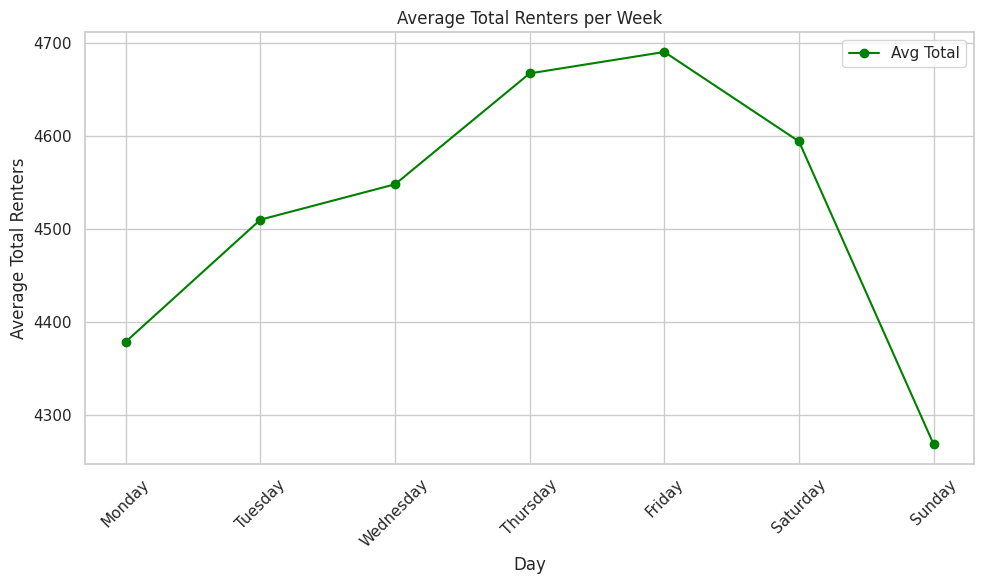

In [ ]:
# Mengatur urutan hari dalam seminggu
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_average['weekday'] = pd.Categorical(weekday_average['weekday'], categories=weekday_order, ordered=True)

# Mengurutkan berdasarkan hari
weekday_average = weekday_average.sort_values('weekday')

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(weekday_average['weekday'], weekday_average['avg_cnt'], marker='o', label='Avg Total', color='green')

# Menambahkan label dan judul
plt.title('Average Total Renters per Week')
plt.xlabel('Day')
plt.ylabel('Average Total Renters')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


**insight**
- Hari minggu memiliki rata-rata jumlah penyewa paling sedikit dibandingkan dengan hari lainnya.
- Saat weekdays jumlah penyewa lebih banyak dibandingkan weekend
- Peak Daysnya adalah pada hari Jumat

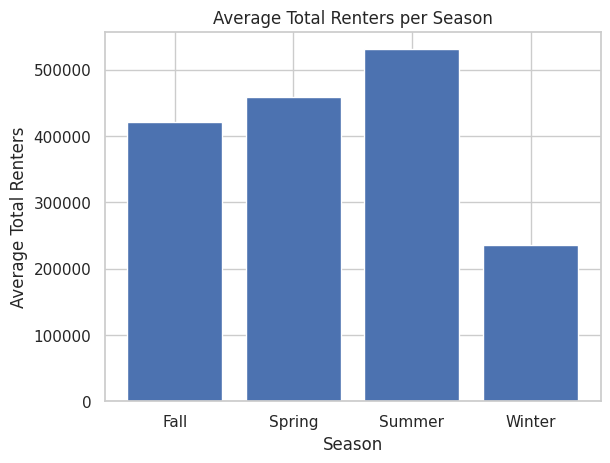

In [ ]:
# Membuat grafik batang hanya untuk kolom 'cnt'
plt.bar(season_average['season'], season_average['avg_cnt'])
plt.title('Average Total Renters per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Renters')
plt.show()

**insight**
- Penyewa sepeda lebih banyak melakukan sewa pada musim panas
- Musim dingin merupakan musim dengan penyewa sepeda yang paling sedikit, bahkan hanya sekitar 50% dari total penyewa sepeda pada musim panas.

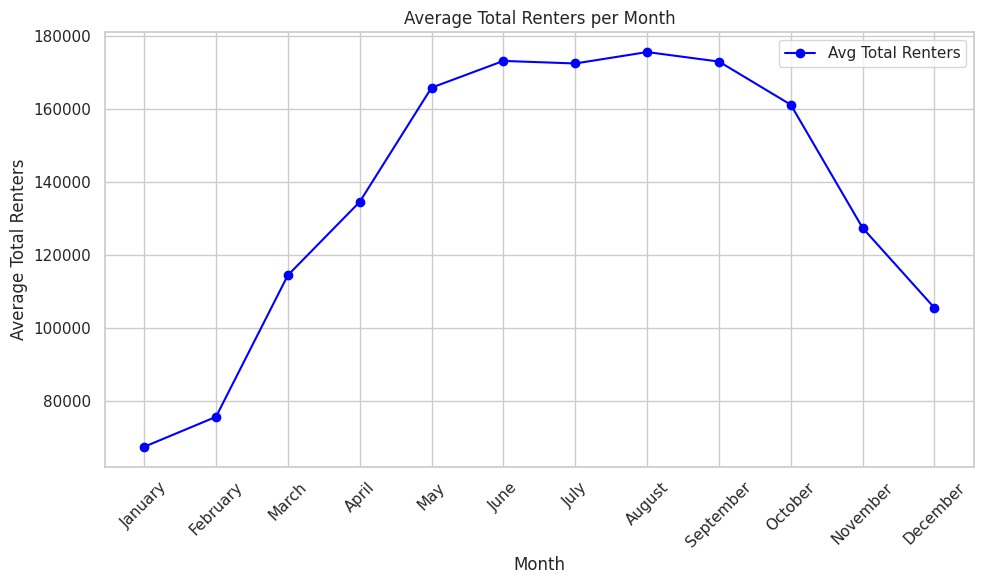

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar nama bulan
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# Mengatur urutan bulan
month_average['month'] = pd.Categorical(month_average['month'], categories=months, ordered=True)

# Mengurutkan berdasarkan bulan
month_average = month_average.sort_values('month')

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(month_average['month'], month_average['avg_cnt'], marker='o', label='Avg Total Renters', color='blue')

# Menambahkan label dan judul
plt.title('Average Total Renters per Month')
plt.xlabel('Month')
plt.ylabel('Average Total Renters')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


**insight**
- Jumlah penyewa mengalami kenaikan pada bulan Januari sampai dengan bulan Juni
- Peak Month penyewa sepeda adalah bulan Agustus
- Pada 4 bulan terakhir yaitu mulai dari bula September-Desember jumlah penyewa terus menurun

### Pertanyaan 2 :

#### Bagaimana hubungan antara jumlah penyewa casual, registered dan jumlah total dengan temperatur, feels like temperatur, kelembapan (humidity) dan windspeed?

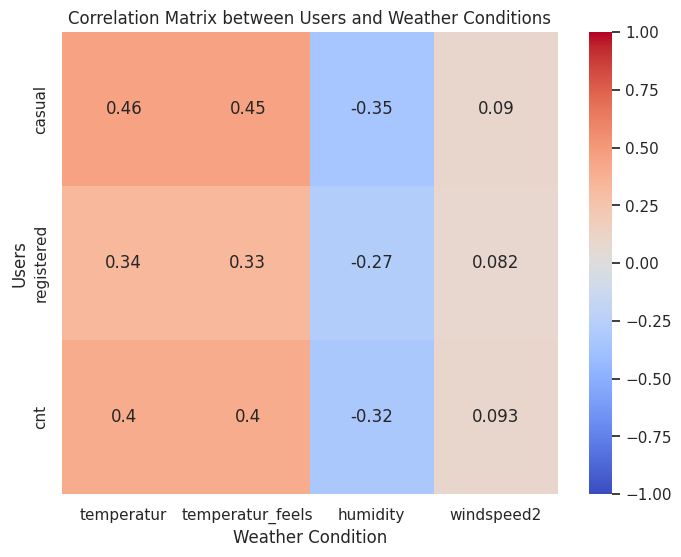

In [ ]:
# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Users and Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Users')
plt.show()

**Insight:**
- Temperatur dan temperatur feels memiliki pengaruh yang paling tinggi untuk penyewa casual, registered maupun secara keseluruhan.
- Tingkat kelembapan udara tidak memiliki pengaruh terhadap jumlah penyewa sepeda.
- Kecepatan angin sedikit berpengaruh terhadap jumlah penyewa sepeda.

## Analisis Lanjutan

### Pertanyaan 3 :

#### Pada saat kapan peak hour penyewa sepeda dan berapa jumlahnya?

In [ ]:
# Mendefinisikan bins dan labels untuk kolom 'hour'
hour_bins = [0, 6, 12, 18, 24]  # Bins untuk jam: 0-5, 6-11, 12-17, 18-23
hour_labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening']  # Label untuk masing-masing bin

# Melakukan binning
hour_df['time_of_day'] = pd.cut(hour_df['hr'], bins=hour_bins, labels=hour_labels, right=False)

# Melihat hasil binning
print(hour_df[['hr', 'time_of_day']].head())

   hr    time_of_day
0   0  Early Morning
1   1  Early Morning
2   2  Early Morning
3   3  Early Morning
4   4  Early Morning


**insight**
- Melakukan proses binning untuk membagi data kedalam interval tertentu, di sini jam dibagi menjadi 4 interval yaitu night, morning, afternoon, dan evening

In [ ]:
# Menghitung jumlah peminjaman
hourly_counts = hour_df.groupby('time_of_day', observed=False)['cnt'].sum()

# Mencari waktu dengan jumlah peminjaman tertinggi
peak_hour = hourly_counts.idxmax()
peak_count = hourly_counts.max()

# Menampilkan hasil
print(f'Peak hour: {peak_hour}, with {peak_count} rentals.')

Peak hour: Afternoon, with 1292742 rentals.


**insight**
- Peminjaman/penyewaan sepeda tertinggi pada saat sore hari (afternoon) dengan jumlah total peminjam/penyewa dari tahun 2011-2012 adalah 1.292.742

## Conclusion


- Jumlah penyewa sepeda pada hari weekday jauh lebih banyak dibanding dengan weekend, musim dingin menjadi musim dengan jumlah penyewa sepeda paling sedikit yaitu hanya sekitar 50% dari total penyewa pada musim panas
- Jumlah penyewa terus mengalami kenaikan dari bulan Januari sampai dengan bulan Juni serta Peak Month penyewa sepeda adalah pada bulan Agustus. Terdapat penurunan jumlah penyewa sepeda dalam 4 bulan terakhir yaitu mulai dari bulan September-Desember.
- Dari analisis yang telah dilakukan, temperature dan temperature feels memiliki pengaruh yang cukup besar untuk jumlah penyewa sepeda casual, registered maupun secara keseluruhan diikuti dengan kecepatan angin yang memilii sedikit pengaruh untuk jumlah penyewa sepeda. Namun, untuk kelembapan sendiri tidak memiliki pengaruh dalam jumlah penyewa sepeda
- Jumlah penyewa tertinggi dari 2011 sampai 2012 adalah pada saat sore hari/afternoon dengan jumlah penyewa mencapai 1.292.742